# Análise dos atletas, Olimpíadas 2024


* Autoria: @pedroblaschi  
[linkedin](https://www.linkedin.com/in/pedro-blaschi-a3b5b22a9/)
[github](https://github.com/blaschis/blaschis)

# libs

In [79]:
#Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')

# Lendo e virificando os dados

In [23]:
#Lendo os dados
df = pd.read_csv('athletes new.csv')

#verificando dataframe
df.head()

,code,name,name_short,name_tv,gender,function,country_code,country,country_full,nationality,nationality_full,nationality_code,height,weight,disciplines,events,birth_date
0,1535420,VALENCIA Alejandra,VALENCIA A,Alejandra VALENCIA,Female,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Women's Individual"", ""Women's Team"", 'Mixed ...",1994-10-17
1,1535429,RUIZ Angela,RUIZ A,Angela RUIZ,Female,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Women's Individual"", ""Women's Team""]",2006-07-28
2,1535430,GRANDE Matias,GRANDE M,Matias GRANDE,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Men's Individual"", ""Men's Team"", 'Mixed Team']",2004-04-26
3,1536460,ROJAS Carlos,ROJAS C,Carlos ROJAS,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Men's Individual"", ""Men's Team""]",2000-01-14
4,1536467,MARTINEZ WING Bruno,MARTINEZ WING B,Bruno MARTINEZ WING,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Men's Individual"", ""Men's Team""]",1998-03-08


In [15]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11115 entries, 0 to 11114
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   codigo                  11115 non-null  int64 
 1   nome                    11115 non-null  object
 2   nome_curto              11115 non-null  object
 3   nome_tv                 11115 non-null  object
 4   genero                  11115 non-null  object
 5   funcao                  11115 non-null  object
 6   codigo_pais             11115 non-null  object
 7   pais                    11115 non-null  object
 8   pais_completo           11115 non-null  object
 9   nacionalidade           11115 non-null  object
 10  nacionalidade_completa  11115 non-null  object
 11  codigo_nacionalidade    11115 non-null  object
 12  altura                  11115 non-null  int64 
 13  peso                    11115 non-null  int64 
 14  disciplinas             11115 non-null  object
 15  ev

,codigo,altura,peso
count,11115.000000,11115.0,11115.0
mean,5557.000000,180.0,75.0
std,3208.768455,0.0,0.0
min,0.000000,180.0,75.0
25%,2778.500000,180.0,75.0
50%,5557.000000,180.0,75.0
75%,8335.500000,180.0,75.0
max,11114.000000,180.0,75.0


In [26]:
#Tradução dos nomes das colunas
df.columns = [
    'codigo', 'nome', 'nome_curto', 'nome_tv', 'genero', 'funcao', 'codigo_pais',
    'pais', 'pais_completo', 'nacionalidade', 'nacionalidade_completa', 'codigo_nacionalidade',
    'altura', 'peso', 'disciplinas', 'eventos', 'data_nascimento'
]

#Verificando
print(df.head())

    codigo                 nome       nome_curto              nome_tv  genero  \
0  1535420   VALENCIA Alejandra       VALENCIA A   Alejandra VALENCIA  Female   
1  1535429          RUIZ Angela           RUIZ A          Angela RUIZ  Female   
2  1535430        GRANDE Matias         GRANDE M        Matias GRANDE    Male   
3  1536460         ROJAS Carlos          ROJAS C         Carlos ROJAS    Male   
4  1536467  MARTINEZ WING Bruno  MARTINEZ WING B  Bruno MARTINEZ WING    Male   

    funcao codigo_pais    pais pais_completo nacionalidade  \
0  Athlete         MEX  Mexico        Mexico        Mexico   
1  Athlete         MEX  Mexico        Mexico        Mexico   
2  Athlete         MEX  Mexico        Mexico        Mexico   
3  Athlete         MEX  Mexico        Mexico        Mexico   
4  Athlete         MEX  Mexico        Mexico        Mexico   

  nacionalidade_completa codigo_nacionalidade  altura  peso  disciplinas  \
0                 Mexico                  MEX       0   0.0  ['A

In [27]:
#dataframe
data = {
    'codigo': range(11115),
    'nome': ['Nome Exemplo']*11115,
    'nome_curto': ['Nome Curto']*11115,
    'nome_tv': ['Nome TV']*11115,
    'genero': ['M']*11115,
    'funcao': ['Atleta']*11115,
    'codigo_pais': ['BR', 'US', 'FR', 'CN', 'BR', 'US']*1852,  #países repetidos
    'pais': ['Brasil', 'EUA', 'França', 'China', 'Brasil', 'EUA']*1852,
    'altura': [180]*11115,
    'peso': [75]*11115,
    'disciplinas': ['Futebol']*11115,
    'eventos': ['Copa do Mundo']*11115,
    'data_nascimento': ['1990-01-01']*11115
  }

# Distribuição de Atletas por País:
Contar o número de atletas por país e verificar a sua distribuição.
Quais são os países com mais atletas nas Olimpíadas?
Como a representatividade de países desenvolvidos se compara com a de países em desenvolvimento?
#Distribuição Desigual
 Países como Brasil e EUA têm significativamente mais atletas, indicando maior investimento esportivo.
# Fatores Econômicos e Culturais
 Países com mais atletas geralmente têm melhores recursos e cultura esportiva forte.
# Oportunidades de Investimento
 Países com menos atletas podem ser alvos para desenvolvimento esportivo.

In [93]:
# encontrando o país com mais atletas
conta_dos_paises = df['pais'].value_counts()

most_commom_conta_dos_paises = conta_dos_paises.idxmax()
most_commom_conta_dos_paises_count = conta_dos_paises.max()

print(f"O país com maior numero de atletas é: {most_commom_conta_dos_paises}")
print(f"Numero de atletas do: {most_commom_conta_dos_paises}: {most_commom_conta_dos_paises_count}")

O país com maior numero de atletas é: United States
Numero de atletas do: United States: 620


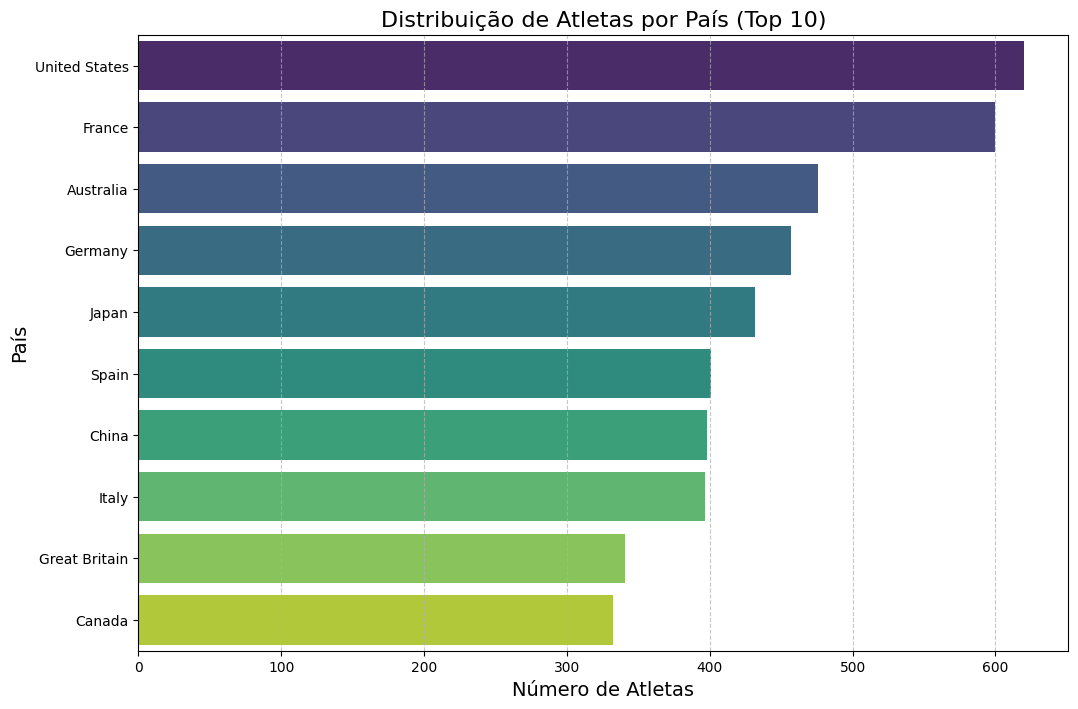

In [29]:
#contar o número de atletas por país
atletas_por_pais = df['pais'].value_counts()

#pegar os 10 países com mais atletas
atletas_por_pais_ordenado = atletas_por_pais.head(10)

#criar o gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x=atletas_por_pais_ordenado.values, y=atletas_por_pais_ordenado.index, palette="viridis")
plt.title('Distribuição de Atletas por País (Top 10)', fontsize=16)
plt.xlabel('Número de Atletas', fontsize=14)
plt.ylabel('País', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Distribuição de Gênero dos Atletas:
Verificar a proporção de atletas masculinos e femininos.

Em quais países há maior ou menor equilíbrio entre gêneros?


In [82]:
df['genero'].value_counts().reset_index(name='Count')

,genero,Count
0,Male,5655
1,Female,5460


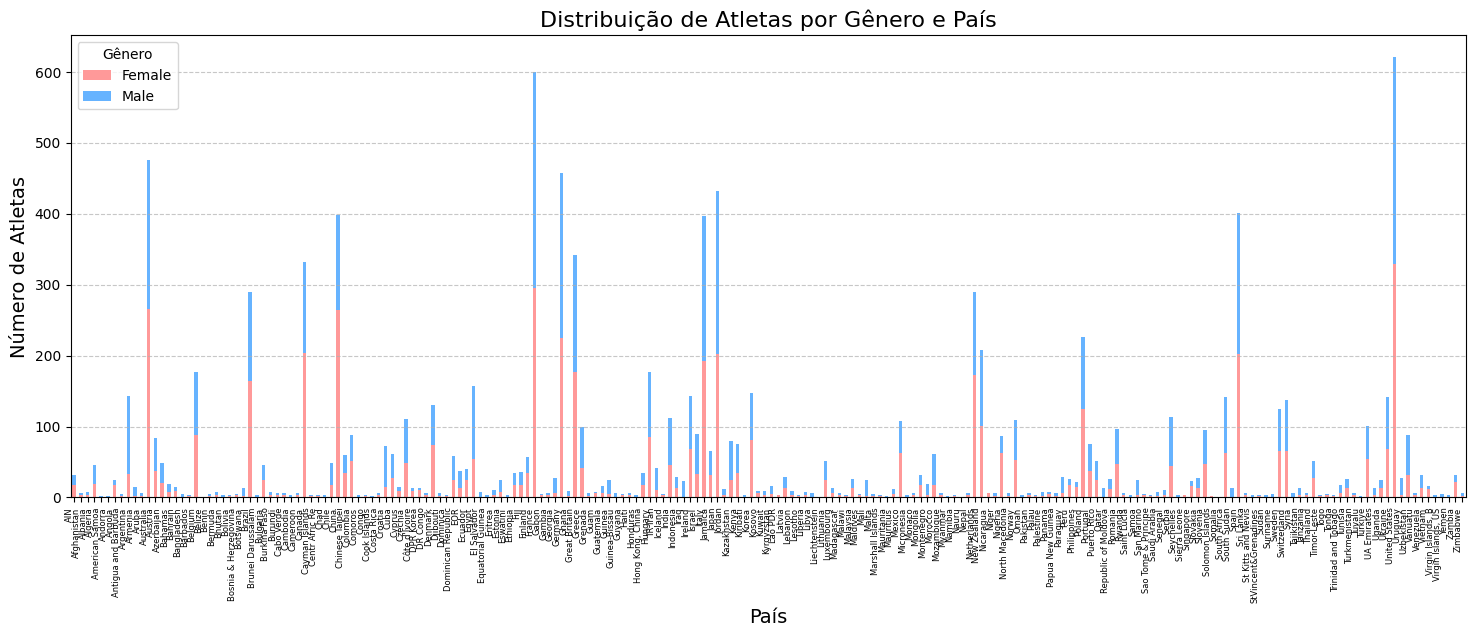

In [50]:
#atletas por gênero e país
atletas_por_genero_pais = df.groupby(['pais', 'genero']).size().unstack().fillna(0)

#criar o gráfico
fig, ax = plt.subplots(figsize=(18, 6))
atletas_por_genero_pais.plot(kind='bar', stacked=True, color=['#FF9999', '#66B3FF', '#99FF99'], ax=ax)
plt.title('Distribuição de Atletas por Gênero e País', fontsize=16)
plt.xlabel('País', fontsize=14)
plt.ylabel('Número de Atletas', fontsize=14)
plt.legend(title='Gênero')
plt.grid(axis='y', linestyle='--', alpha=0.7)

#ajustar o tamanho da fonte
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', fontsize=6)

plt.show()

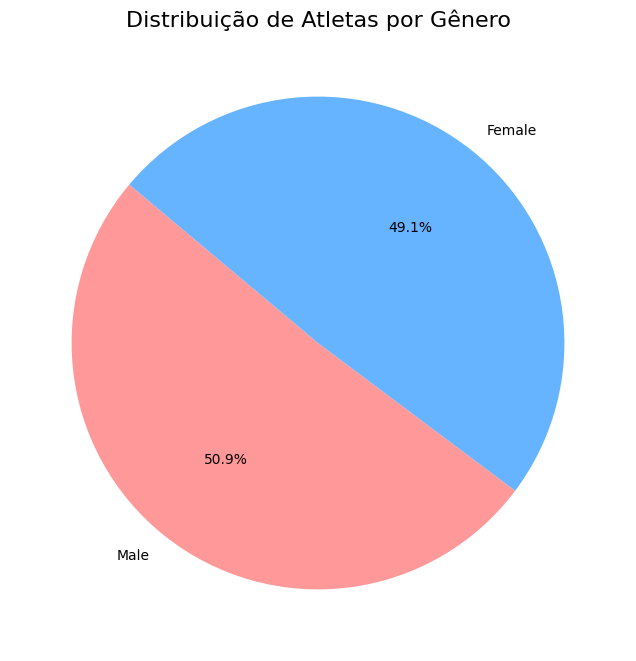

In [32]:
#contar atletas por gênero
atletas_por_genero = df['genero'].value_counts()

#criar o gráfico
plt.figure(figsize=(8, 8))
plt.pie(atletas_por_genero, labels=atletas_por_genero.index, autopct='%1.1f%%', startangle=140, colors=['#FF9999', '#66B3FF', '#99FF99'])
plt.title('Distribuição de Atletas por Gênero', fontsize=16)
plt.show()

# Distribuição de Altura e Peso dos Atletas:
Estudar a distribuição de altura e peso entre os atletas por disciplina ou esporte.

Identificar quais esportes tendem a ter atletas mais altos ou mais pesados.


In [86]:
#Média de peso e altura
altura_media = df['altura'].mean()
peso_medio = df['peso'].mean()

print(f"peso médio dos atletas: {altura_media}")
print(f"altura média dos atletas: {peso_medio}")

peso médio dos atletas: 81.83517768780926
altura média dos atletas: 2.2137129471123527


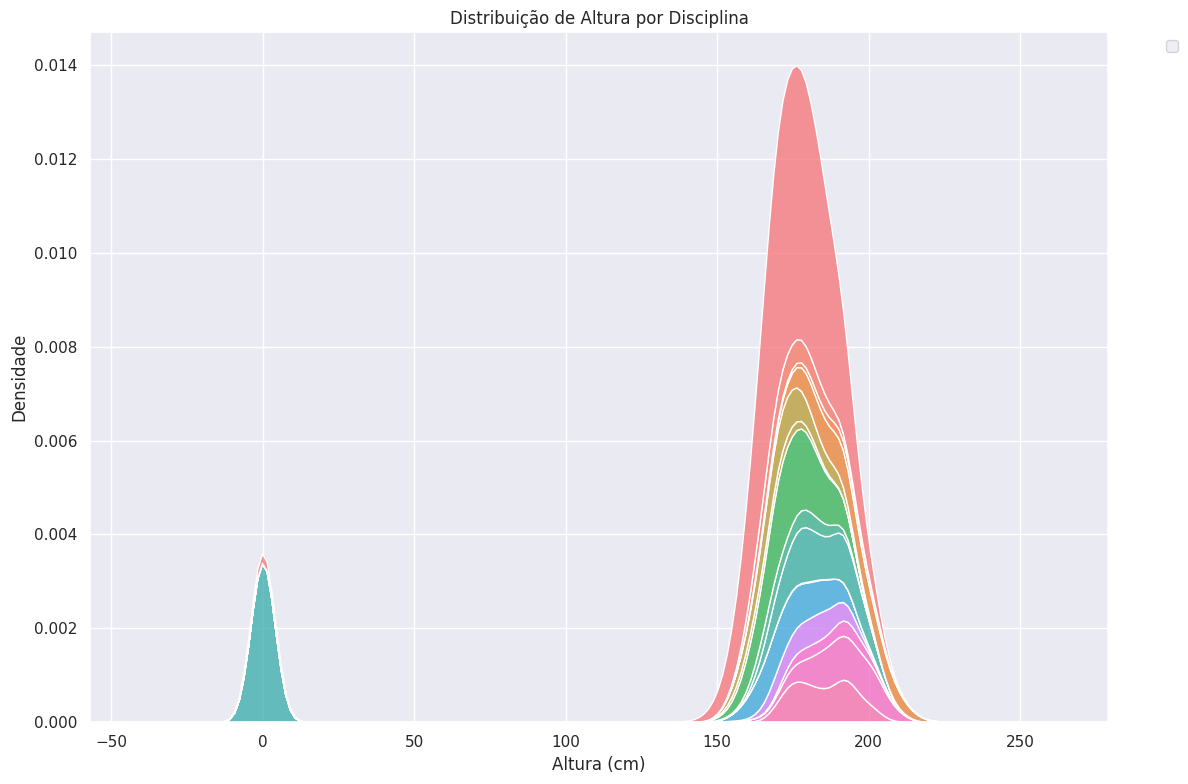

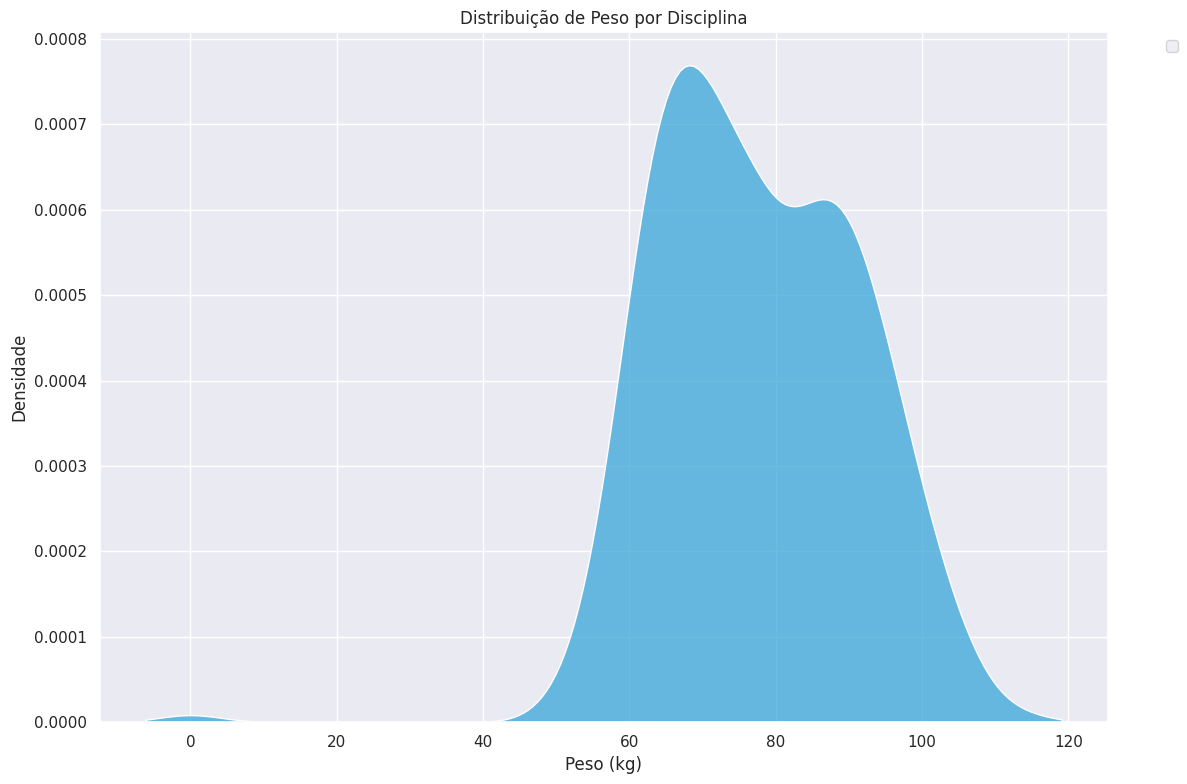

In [67]:
#dataframe
df_analysis = df[['pais', 'disciplinas', 'altura', 'peso']]

sns.set(style="darkgrid")

#plotando altura por disciplina e país
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df_analysis, x='altura', hue='disciplinas', multiple='stack')
plt.title('Distribuição de Altura por Disciplina')
plt.xlabel('Altura (cm)')
plt.ylabel('Densidade')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#plotando distribuição de peso por disciplina e país
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df_analysis, x='peso', hue='disciplinas', multiple='stack')
plt.title('Distribuição de Peso por Disciplina')
plt.xlabel('Peso (kg)')
plt.ylabel('Densidade')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

# Idade dos Atletas por Disciplina
Avaliar a idade dos atletas e como ela varia de acordo com os esportes.

Identificar esportes que atraem atletas mais jovens ou mais experientes.

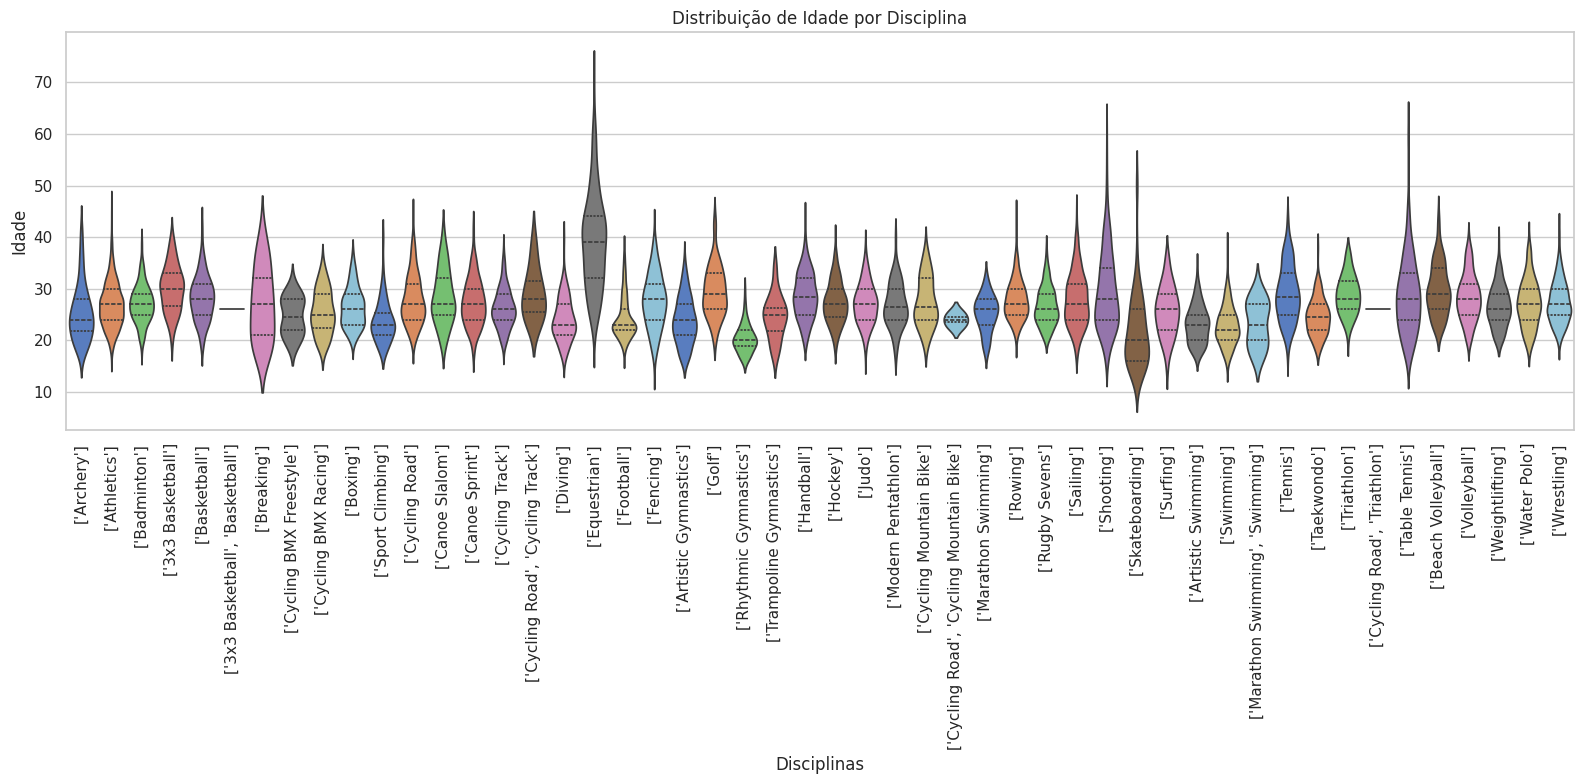

In [77]:
#calculando a idade dos atletas
df['data_nascimento'] = pd.to_datetime(df['data_nascimento'])
df['idade'] = df['data_nascimento'].apply(lambda x: datetime.now().year - x.year)

#dataframe
df_analysis = df[['disciplinas', 'idade']]

sns.set(style="whitegrid")

#plotando a distribuição de idade por disciplina
plt.figure(figsize=(16, 8))
sns.violinplot(x='disciplinas', y='idade', data=df_analysis, inner='quartile', palette='muted')
plt.title('Distribuição de Idade por Disciplina')
plt.xticks(rotation=90)
plt.xlabel('Disciplinas')
plt.ylabel('Idade')
plt.tight_layout()
plt.show()